## Frequent Category Imputation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("house_prediction_train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [3]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

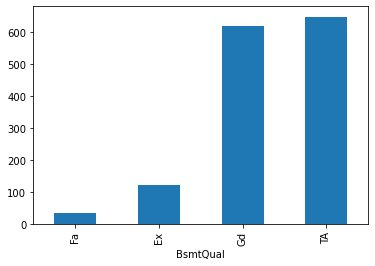

In [6]:
### computer the frequency
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values().plot.bar()

In [11]:
df.groupby(['BsmtQual']).count()

,FireplaceQu,GarageType,SalePrice
BsmtQual,,,
Ex,105,121,121
Fa,8,32,35
Gd,380,601,618
TA,268,595,649


In [12]:
df.groupby(['BsmtQual'])['GarageType'].count()

BsmtQual
Ex    121
Fa     32
Gd    601
TA    595
Name: GarageType, dtype: int64

In [13]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:>

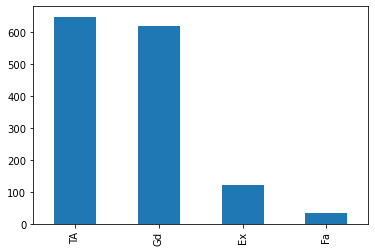

In [16]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

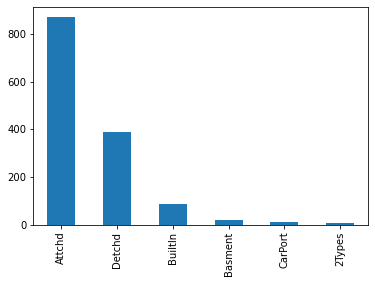

In [17]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

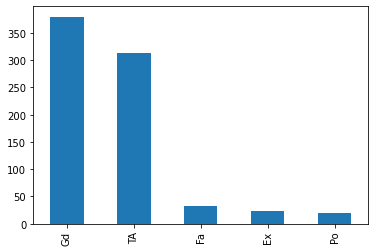

In [18]:
df['FireplaceQu'].value_counts().plot.bar()

In [20]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [21]:
df['BsmtQual'].value_counts().index[0]

'TA'

In [24]:
def impute_nan(df,feature):
    most_frequent_category = df[feature].value_counts().index[0]  ### df[feature].mode()[0]
    df[feature].fillna(most_frequent_category,inplace=True)

In [25]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [26]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## Adding new variable to capture Nan

In [27]:
df = pd.read_csv("house_prediction_train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [28]:
import numpy as np
df['BmstQual_Nan'] = np.where(df['BsmtQual'].isnull(),1,0)

In [29]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BmstQual_Nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [30]:
frequent = df['BsmtQual'].mode()[0]

In [31]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [33]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BmstQual_Nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


## If more Frequent Categories, Replace nan with a New category

In [42]:
df = pd.read_csv("house_prediction_train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [43]:
def impute_nan(df, variable):
    df[variable+"_New"] = np.where(df[variable].isnull(),"Missing",df[variable])

In [44]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [45]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_New,FireplaceQu_New,GarageType_New
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [46]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [47]:
df.head()

,SalePrice,BsmtQual_New,FireplaceQu_New,GarageType_New
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
